In [2]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import s2fft


JAX is not using 64-bit precision. This will dramatically affect numerical precision at even moderate L.


In [5]:
def mw_alm_2_hp_alm(MW_alm, lmax):
    '''MW_alm: 2D array of shape (Lmax, 2*Lmax-1) (MW sampling, McEwen & Wiaux)
    '''
    # Initialize the 1D hp_alm array with the appropriate size
    hp_alm = np.zeros(hp.Alm.getsize(lmax), dtype=np.complex128)
        
    for l in range(lmax + 1):
        for m in range(-l, l + 1):
            index = hp.Alm.getidx(lmax, l, abs(m))
            if m < 0:
                hp_alm[index] = (-1)**m * np.conj(MW_alm[l, lmax + m])
            else:
                hp_alm[index] = MW_alm[l, lmax + m]

    return hp_alm


def visualize_wavelet_coefficient_map(MW_Pix_Map, title, Frequency, min=None, max=None):
    """
    Processes a wavelet coefficient map and visualizes it using HEALPix mollview.
    Parameters:
        original_70: numpy array representing the wavelet coefficient map.
    Returns:
        Displays a mollview map.
    """
    # import healpy as hp  # Make sure to import healpy
    # from s2fft import forward  # Assuming s2fft.forward is imported
    if MW_Pix_Map.shape[0] != 1:
        L_max = MW_Pix_Map.shape[0]
    else:
        L_max = MW_Pix_Map.shape[1]
    original_map_alm = s2fft.forward(MW_Pix_Map, L=L_max)
    # print("Original map alm shape:", original_map_alm.shape)
    
    original_map_hp_alm = mw_alm_2_hp_alm(original_map_alm, L_max - 1)
    original_hp_map = hp.alm2map(original_map_hp_alm, nside=(L_max - 1)//2)

    hp.mollview(
        # original_hp_map * 1e5,
        original_hp_map,
        coord=["G"],
        title=title+Frequency,
        # unit=r"$1e5$K",
        # min=min, max=max,  # Uncomment and adjust these as necessary for better visualization contrast
    )


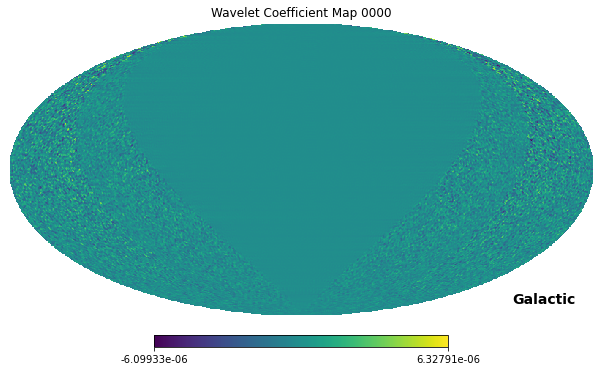

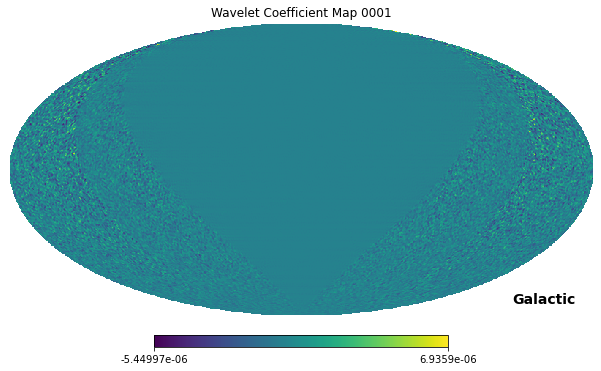

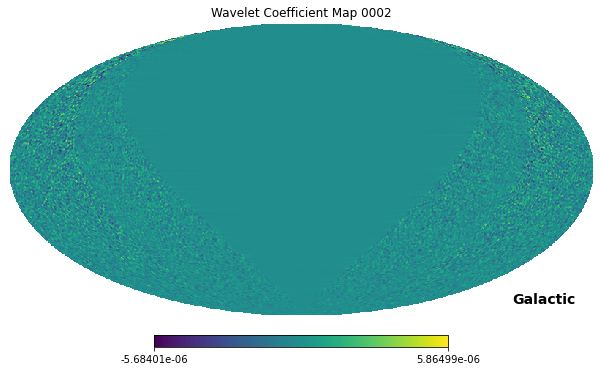

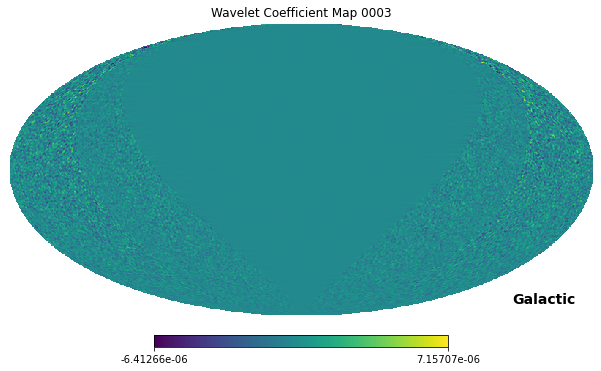

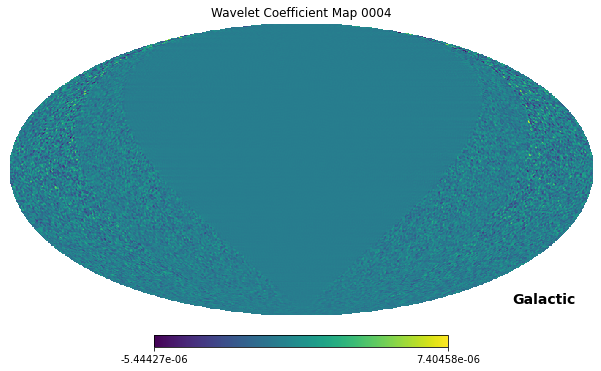

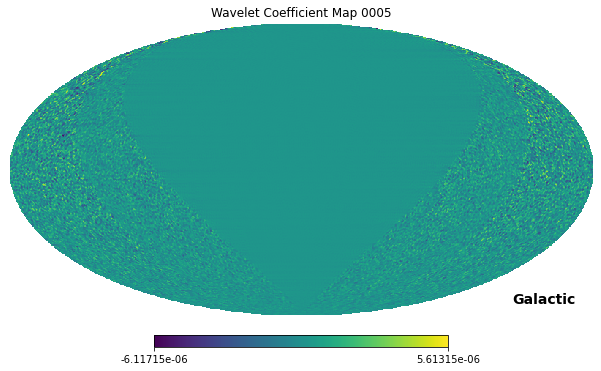

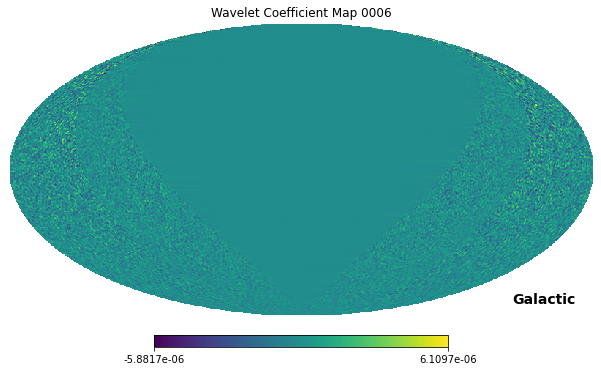

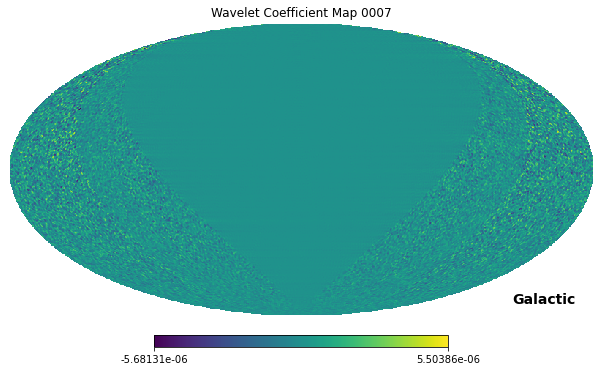

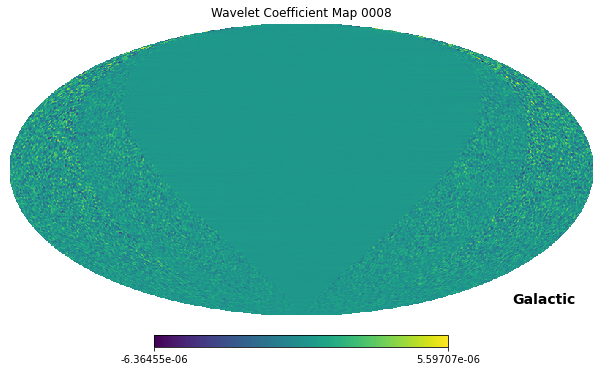

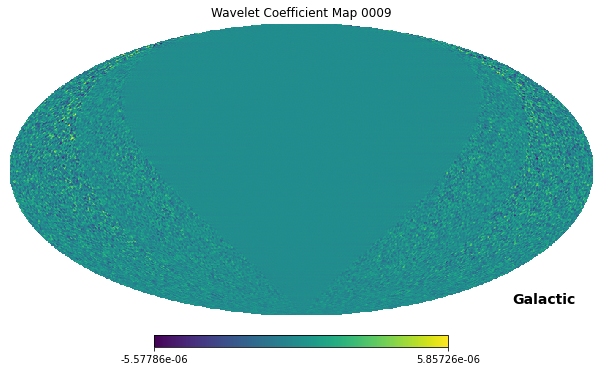

In [12]:
for realization in range(10):
    realization_str = str(realization).zfill(4)
    MW_Pix_Map = s2fft.inverse(np.load(f'mask_R{realization_str}.npy'),L = 256)
    visualize_wavelet_coefficient_map(MW_Pix_Map, 'Wavelet Coefficient Map ', f'{realization_str}')
    # plt.savefig(f'../data/processed/figures/Wavelet_Coefficient_Map_{i}.png')
    # plt.show()
    # plt.close()